### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import fcluster
%matplotlib inline

### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [2]:
#Reading the dataset and dropping null values
vehicle_df = pd.read_csv('vehicle.csv').dropna()

In [3]:
#Looking at the head
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

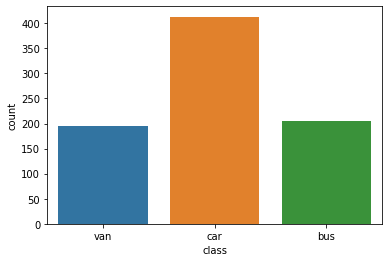

In [4]:
#Plotting the value counts
sns.countplot(vehicle_df['class'])

**Insight:** Looks like the majority class is car, while bus and van have similar counts

### Check for any missing values in the data 

In [5]:
#Using the info function to look for missing values
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

**Insights:** There are no null values.

### 3. Standardize the data 

In [6]:
#Splitting the features and the target
X = vehicle_df.drop(labels = 'class', axis = 1)
y = vehicle_df['class']

In [7]:
#Using the zscore function to normalize the data
from scipy.stats import zscore
X_scaled = X.apply(zscore)

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [8]:
distortion = []

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

In [9]:
cluster_range = range( 2, 10)  
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5, random_state=1)
  clusters.fit(X)
  labels = clusters.labels_                           
  distortion.append( clusters.inertia_ )   
  cluster_sil_scores.append(silhouette_score(X, labels, metric='euclidean'))

# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": distortion , "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]

,num_clusters,cluster_errors,Avg Sil Score
0,2,6.905477e+06,0.672528
1,3,4.610991e+06,0.528526
2,4,3.333417e+06,0.441064
3,5,2.291575e+06,0.463471
4,6,1.823916e+06,0.440104
5,7,1.601418e+06,0.385938
6,8,1.465364e+06,0.339559
7,9,1.305235e+06,0.347560


Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

### 6. Plotting Elbow/ Scree Plot

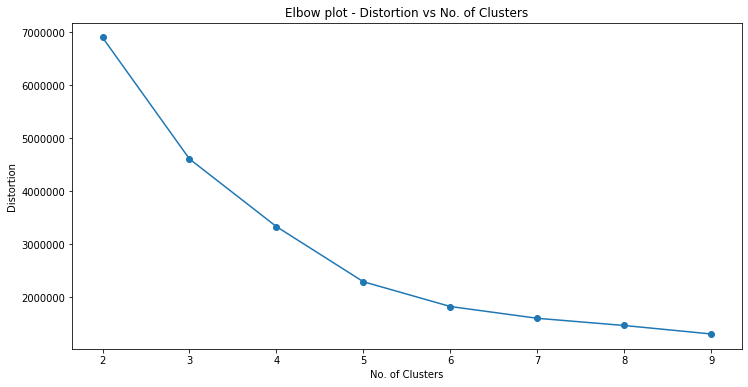

In [10]:
plt.figure(figsize=(12,6))
plt.title('Elbow plot - Distortion vs No. of Clusters')
plt.xlabel('No. of Clusters')
plt.ylabel('Distortion')
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

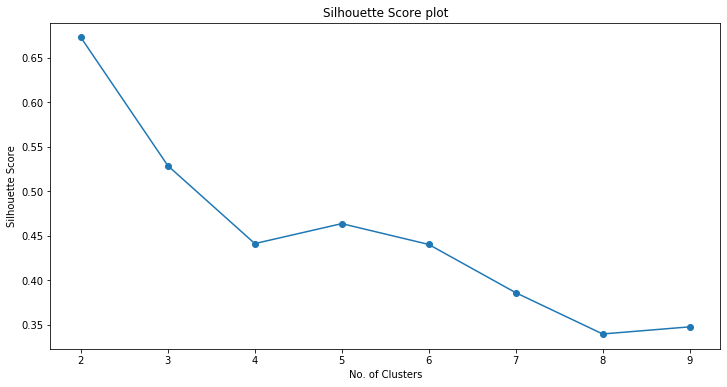

In [11]:
plt.figure(figsize=(12,6))
plt.title('Silhouette Score plot')
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette Score')
plt.plot( clusters_df.num_clusters, clusters_df['Avg Sil Score'], marker = "o" )

### Find out the optimal value of K

The optimal value of K from the elbow plot is around 5 or 6. Looking at the silhoette plot we can say that 5 is the best bet as the average silhouette score is higher at k = 5.  
**Therfore, K = 5**

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [12]:
Model = KMeans(n_clusters = 5, n_init=5, random_state = 1)
Model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [13]:
labels = Model.labels_

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [14]:
centroids = Model.cluster_centers_

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [15]:
pd.DataFrame(data = centroids, columns=list(X.columns))

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,97.241071,46.178571,92.000000,196.866071,64.000000,8.482143,185.446429,35.419643,21.741071,149.125000,205.982143,519.508929,180.723214,68.285714,5.803571,13.473214,193.250000,200.035714
1,87.843373,38.295181,63.927711,133.253012,57.246988,6.686747,130.349398,51.668675,17.795181,133.337349,151.819277,252.054217,140.933735,72.530120,6.331325,11.367470,188.409639,193.524096
2,103.982659,52.872832,102.838150,202.976879,62.693642,10.323699,214.138728,31.075145,24.138728,166.618497,225.658960,679.797688,210.543353,71.254335,7.508671,16.190751,188.554913,197.924855
3,89.217009,42.768328,75.747801,158.838710,63.123167,8.868035,153.565982,43.516129,19.299120,143.824047,176.392962,350.958944,165.551320,73.583578,5.953079,11.149560,188.457478,195.014663
4,107.523810,55.476190,103.047619,191.857143,56.238095,5.761905,248.666667,26.904762,27.047619,168.142857,270.952381,909.380952,245.428571,83.523810,6.380952,15.047619,182.666667,183.714286


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [16]:
#Printing the model labels
print(Model.labels_)

[3 3 2 3 3 3 1 1 1 1 3 3 0 2 1 0 2 3 1 3 3 2 3 1 2 0 3 3 1 1 2 3 3 3 2 3 2
 1 3 3 2 3 1 3 3 3 1 3 2 3 4 1 0 3 2 1 0 1 1 3 0 3 2 3 0 2 0 1 3 0 0 3 3 2
 1 3 3 4 3 1 0 1 2 3 0 3 3 2 3 3 2 3 3 3 1 1 0 0 3 3 0 3 3 3 1 3 3 2 2 0 1
 3 3 1 3 3 3 3 3 2 0 3 0 1 2 3 3 1 1 3 3 2 3 3 2 3 3 3 1 0 0 3 2 3 4 3 1 3
 1 2 3 1 2 2 3 2 3 1 2 4 3 2 3 3 0 3 1 2 1 3 1 2 0 3 3 2 3 0 3 4 3 3 2 3 3
 3 3 3 2 2 1 3 3 3 2 0 1 3 2 1 3 2 3 1 2 3 3 1 3 2 1 2 3 1 1 3 2 1 3 3 2 3
 3 3 3 2 3 1 3 3 2 1 2 3 3 3 2 3 3 2 2 1 0 1 1 0 3 3 1 1 3 0 3 4 3 3 1 2 3
 0 3 3 2 3 3 0 1 1 3 3 1 4 3 0 1 0 0 2 3 3 1 3 3 2 2 2 0 3 3 0 3 1 1 0 1 2
 4 3 0 3 3 0 3 3 3 0 2 3 4 2 3 2 3 3 3 1 1 2 2 2 3 3 1 0 3 3 3 0 0 3 2 3 0
 2 0 3 3 3 2 3 1 3 3 0 3 3 1 2 2 1 1 2 1 4 3 2 1 3 0 3 3 2 3 1 3 3 0 3 3 3
 1 2 3 2 1 0 3 1 1 3 3 3 1 3 1 3 2 3 3 3 1 2 1 3 0 1 2 3 2 1 2 2 3 3 2 1 1
 3 0 0 0 3 1 0 4 3 0 2 2 3 3 3 3 3 2 3 1 3 2 0 1 2 3 3 0 3 3 2 1 1 2 2 2 3
 2 2 3 0 3 2 2 3 1 3 3 2 3 3 2 2 3 3 2 4 3 3 1 2 2 2 1 3 0 2 2 3 3 2 3 3 2
 3 1 1 3 2 3 1 0 1 3 2 3 

In [17]:
#Appending the label column to the initial dataset
X['Cluster'] = Model.labels_
X.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,Cluster
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,3
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,3
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,2
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,3
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,3


In [18]:
#Looking at the value counts
X.groupby('Cluster').count()['compactness']

Cluster
0    112
1    166
2    173
3    341
4     21
Name: compactness, dtype: int64

**Insights:** Cluster 3 is the biggest amongst them all. Could be that there are a lot of cars present here.

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [19]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[100,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### 9. Combine all three arrays a,b,c into a dataframe

In [20]:
#Using np.concatenate 
df = pd.DataFrame(np.concatenate([a,b,c] ,axis = 0), columns=['X','Y'])

### 10. Use scatter matrix to print all the 3 distributions

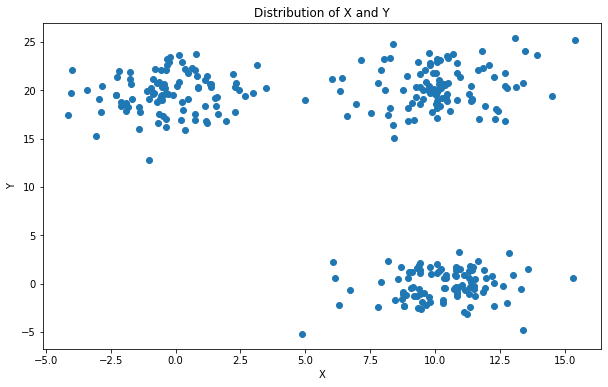

In [21]:
plt.figure(figsize = (10,6))
plt.title('Distribution of X and Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x = 'X',y =  'Y', data = df)

**Insights:** From the above scatter plot it looks like there are 3 clusters here.

### 11. Find out the linkage matrix

In [22]:
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [23]:
Z = linkage(df, method= 'ward', metric = 'euclidean')
c, coph_dists = cophenet(Z , pdist(df))

In [24]:
Z_df = pd.DataFrame(Z)
Z_df.head()

,0,1,2,3
0,134.0,168.0,0.012527,2.0
1,129.0,141.0,0.025228,2.0
2,16.0,36.0,0.025811,2.0
3,30.0,88.0,0.053361,2.0
4,107.0,116.0,0.054480,2.0


Use ward as linkage metric and distance as Eucledian

### 12. Plot the dendrogram for the consolidated dataframe

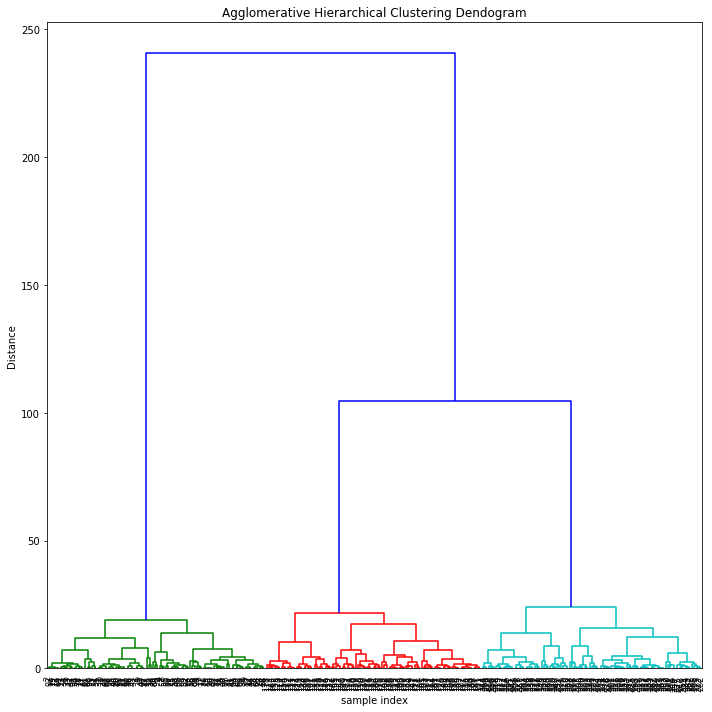

In [25]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

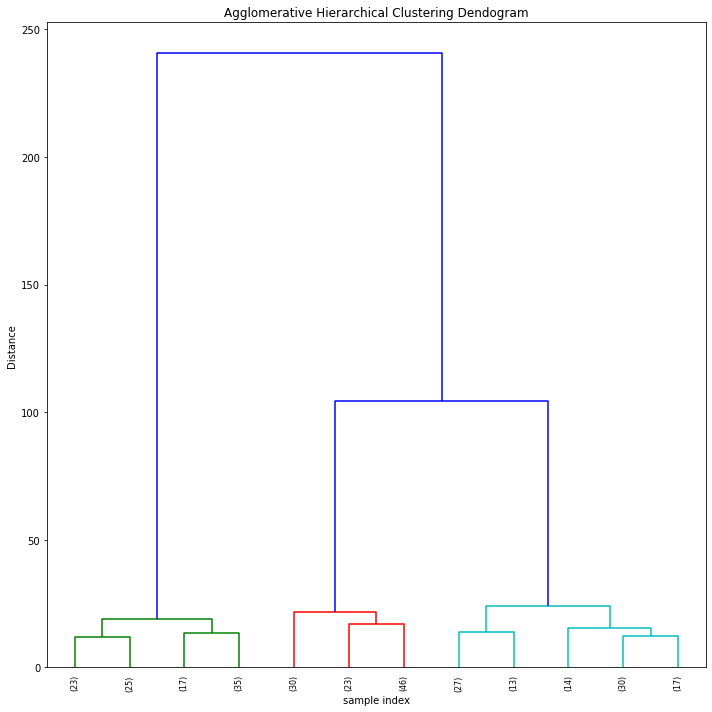

In [26]:
#Using p = 12 to plot the last 12 merged clusters
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8., truncate_mode='lastp', p = 12)
plt.tight_layout()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [27]:
#Breaking the loop when the number of clusters reaches 3
for t in range(0,100):
    if(max(fcluster(Z, t, criterion='distance')) == 3):
        break
        
print('Optimal value of t = ',t)

Optimal value of t =  25


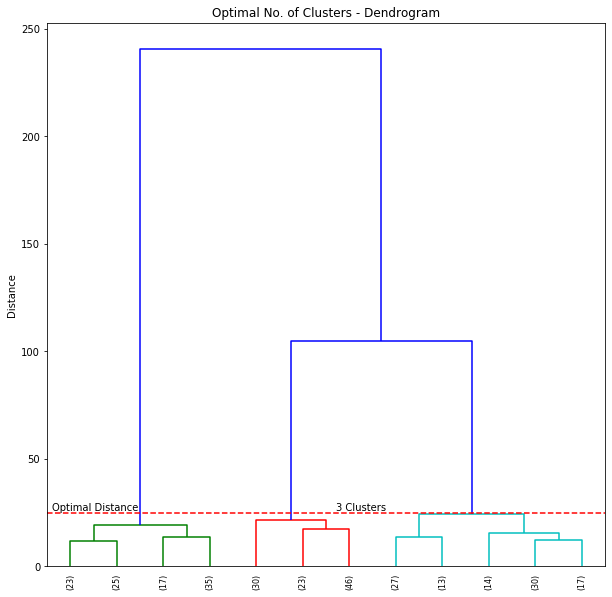

In [28]:
plt.figure(figsize=(10, 10))  
plt.title("Optimal No. of Clusters - Dendrogram")  
plt.ylabel('Distance')
dend = dendrogram(Z,leaf_rotation=90.,color_threshold = 30, leaf_font_size=8., truncate_mode='lastp', p = 12)
plt.axhline(y=t, color='r', linestyle='--')
plt.text(x = 62, y = t+1, s = '3 Clusters', )
plt.text(x = 1, y = t+1, s = 'Optimal Distance', )
plt.show()

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [29]:
#Importing the fcluster library
from scipy.cluster.hierarchy import fcluster

In [30]:
#Storing the Cluster values in the initial df
df['Cluster'] = fcluster(Z, t, criterion='distance')
df.head()

,X,Y,Cluster
0,8.760026,-1.086224,1
1,10.294891,-1.974762,1
2,10.403717,-0.496851,1
3,12.636173,-0.244945,1
4,7.928011,0.199475,1


### Use matplotlib to visually observe the clusters in 2D space 

<Figure size 720x720 with 0 Axes>

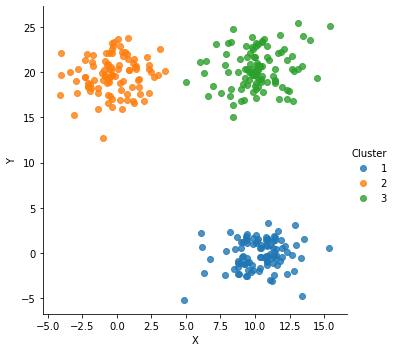

In [31]:
plt.figure(figsize = (10,10))
sns.lmplot(x = 'X', y = 'Y', hue = 'Cluster', data=df, fit_reg = False )

**Insights**:  
Looks like the hierarchical clustering algorithm was able to cleanly separate the data into 3 heterogenous clusters

-------